# Logistic Regression

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
case711 <- read.csv("https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p7.11.csv")
case711

Hours,Pass
<dbl>,<int>
4.0,1
3.7,1
2.0,0
3.0,0
1.0,0
1.0,0
3.2,1
3.8,1
4.0,1


In [3]:
glm.out <- glm(Pass ~ Hours,
               data = case711,
               family = binomial)                   # 建立模型

In [4]:
summary(glm.out)


Call:
glm(formula = Pass ~ Hours, family = binomial, data = case711)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.49560  -0.05266  -0.00022   0.15824   1.50244  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -21.186     10.079  -2.102   0.0356 *
Hours          7.303      3.393   2.152   0.0314 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.615  on 36  degrees of freedom
Residual deviance: 13.682  on 35  degrees of freedom
AIC: 17.682

Number of Fisher Scoring iterations: 8


In [5]:
lr_data <- data.frame(predictor=glm.out$linear.predictors, prob=glm.out$fitted.values, Pass=case711$Pass)

In [6]:
require(ggplot2)

Loading required package: ggplot2



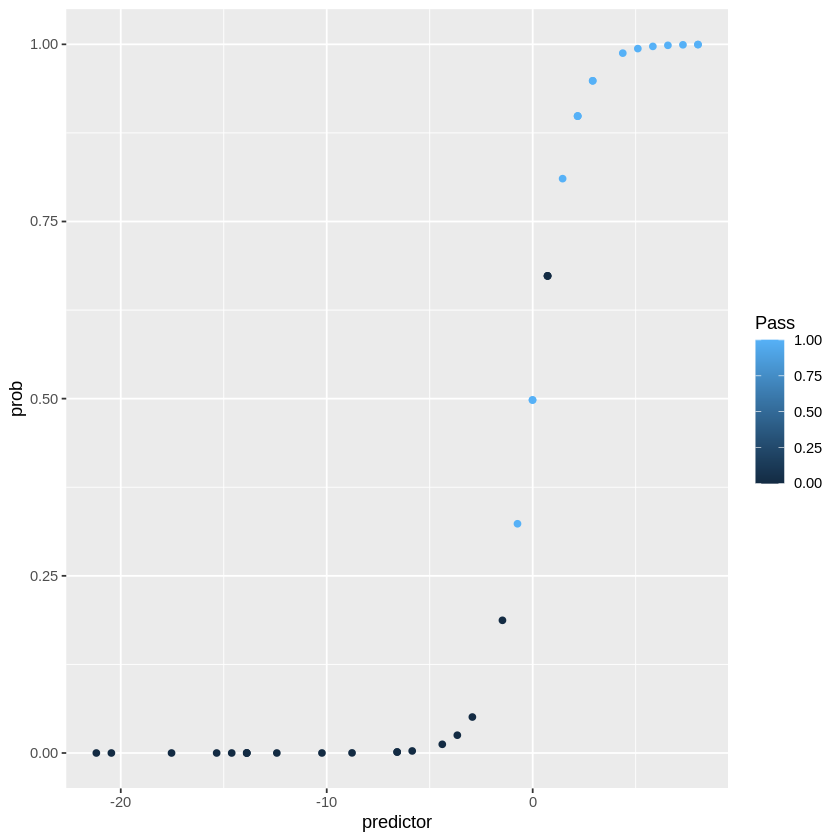

In [7]:
ggplot(lr_data, aes(x=predictor, y=prob, color=Pass)) + geom_point()

In [8]:
newdata = data.frame(Hours = c(1, 2, 2.5, 3, 3.5, 4, 5, 6))
probabilities =  predict(glm.out, newdata, type = "response")
predicted.classes = ifelse(probabilities > 0.5, "pass", "fail")
predicted.classes

1      2      3      4      5      6      7      8 
"fail" "fail" "fail" "pass" "pass" "pass" "pass" "pass"